In [1]:
install.packages("GGally")

also installing the dependencies ‘prettyunits’, ‘progress’, ‘reshape’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
net = rgraph(10, mode = "graph", tprob = 0.5)

ERROR: Error in rgraph(10, mode = "graph", tprob = 0.5): could not find function "rgraph"


In [5]:
install.packages("devtools")

also installing the dependencies ‘ini’, ‘desc’, ‘xopen’, ‘clisymbols’, ‘fs’, ‘gh’, ‘git2r’, ‘memoise’, ‘pkgbuild’, ‘pkgload’, ‘rcmdcheck’, ‘remotes’, ‘sessioninfo’, ‘usethis’

Warning message in install.packages("devtools"):
“installation of package ‘fs’ had non-zero exit status”Warning message in install.packages("devtools"):
“installation of package ‘git2r’ had non-zero exit status”Warning message in install.packages("devtools"):
“installation of package ‘usethis’ had non-zero exit status”Warning message in install.packages("devtools"):
“installation of package ‘devtools’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [13]:
devtools:install_github("briatte/ggnet")

ERROR: Error in eval(expr, envir, enclos): object 'devtools' not found


In [14]:
library(dplyr)
library(devtools)

ERROR: Error in library(devtools): there is no package called ‘devtools’


In [16]:
install.packages("igraph")

Warning message in install.packages("igraph"):
“installation of package ‘igraph’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [11]:
adjframe <- read.delim(header = F, "interaction2.dat")

In [12]:
head(adjframe)

V1,V2,V3,V4,V5
0.0000,0.0000,2.7340,-3.4308,-3.6890
-2.1886,0.7562,1.3942,10.4427,0.0000
0.0000,-0.8876,1.0421,7.4029,-1.3434
3.1930,-2.3340,1.1053,-8.3297,-3.0700
0.0000,-1.6278,0.9455,9.2586,0.0000


In [15]:
adjmatrix <- as.matrix(adjframe)

In [61]:
diag(adjmatrix) <- 0

In [62]:
adjmatrix

V1,V2,V3,V4,V5
0.0000,0.0000,2.7340,-3.4308,-3.6890
-2.1886,0.0000,1.3942,10.4427,0.0000
0.0000,-0.8876,0.0000,7.4029,-1.3434
3.1930,-2.3340,1.1053,0.0000,-3.0700
0.0000,-1.6278,0.9455,9.2586,0.0000


In [116]:
g <- graph.adjacency(adjmatrix,mode="directed",weighted=T)
g.names <- c('Actinobacteria',              'Bacteroidetes',                 'Firmicutes',                   'Fusobacteria',                'Proteobacteria')
gp <- graph.adjacency(abs(adjmatrix),mode="directed",weighted=T)

In [117]:
g

IGRAPH c54b3dc DNW- 5 16 -- 
+ attr: name (v/c), weight (e/n)
+ edges from c54b3dc (vertex names):
 [1] V1->V3 V1->V4 V1->V5 V2->V1 V2->V3 V2->V4 V3->V2 V3->V4 V3->V5 V4->V1
[11] V4->V2 V4->V3 V4->V5 V5->V2 V5->V3 V5->V4

In [118]:
E(g)$weight

[1]  2.7340 -3.4308 -3.6890 -2.1886  1.3942 10.4427 -0.8876  7.4029 -1.3434
[10]  3.1930 -2.3340  1.1053 -3.0700 -1.6278  0.9455  9.2586

In [119]:
E(g)$color <- ifelse(E(g)$weight > 0,'blue','red')
#E(g)$weight <- edge.betweenness(gp)
coords <- layout_in_circle(g, order = V(g))


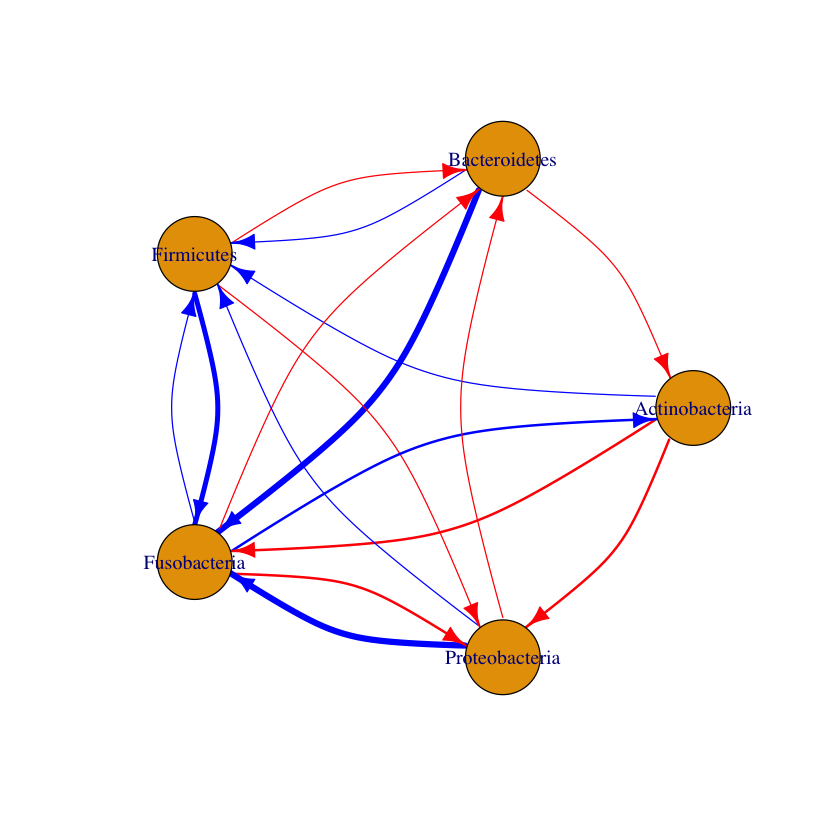

In [147]:
plot(g, curved=T, edge.width=as.integer(cut(abs(E(g)$weight), breaks = 5)), layout=coords, edge.arrow.size=1., edge.curved=.3, vertex.label=g.names,vertex.size=30, vertex.shape="circle")